**Random Forest Algorithm- Lung Cancer Dataset**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/lung_cancer_examples.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
df.shape

(59, 7)

In [ ]:
df.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

In [ ]:
print(df.isnull().sum())

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [8]:
# removing the object columns
df=df.drop(['Name','Surname'],axis=1)
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [9]:
# input and output 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train

,Age,Smokes,AreaQ,Alkhol
55,77,20,5,4
30,36,13,5,2
41,47,12,8,0
48,53,20,6,3
27,34,12,8,0
46,31,20,9,4
57,43,30,3,8
31,56,20,3,3
13,28,20,2,8
22,22,20,6,2


In [13]:
#scaling-min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[1.        , 0.66666667, 0.44444444, 0.5       ],
       [0.30508475, 0.43333333, 0.44444444, 0.25      ],
       [0.49152542, 0.4       , 0.77777778, 0.        ],
       [0.59322034, 0.66666667, 0.55555556, 0.375     ],
       [0.27118644, 0.4       , 0.77777778, 0.        ],
       [0.22033898, 0.66666667, 0.88888889, 0.5       ],
       [0.42372881, 1.        , 0.22222222, 1.        ],
       [0.6440678 , 0.66666667, 0.22222222, 0.375     ],
       [0.16949153, 0.66666667, 0.11111111, 1.        ],
       [0.06779661, 0.66666667, 0.55555556, 0.25      ],
       [0.40677966, 0.4       , 0.55555556, 0.25      ],
       [0.49152542, 0.5       , 0.        , 1.        ],
       [0.01694915, 0.4       , 0.77777778, 0.        ],
       [0.13559322, 0.43333333, 0.55555556, 0.125     ],
       [0.74576271, 0.83333333, 0.22222222, 0.5       ],
       [0.44067797, 0.16666667, 0.77777778, 0.125     ],
       [0.84745763, 0.13333333, 0.44444444, 0.75      ],
       [0.27118644, 0.83333333,

In [14]:
# apply random forest algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100) # to specify how many decision trees to be used
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

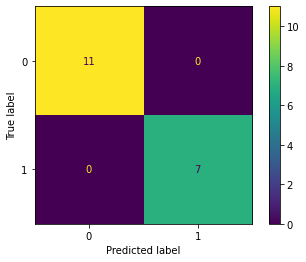

In [15]:
# check the classification report & confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
# model is accurate

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

